<a href="https://colab.research.google.com/github/pavankumarallu/Search-Engine-Models/blob/main/Results_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, LeakyReLU, BatchNormalization, Conv2DTranspose
from keras.models import Model
from keras import backend as K
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model

import numpy as np
from PIL import Image
import os 
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.python.client import device_lib

from sklearn.cluster import KMeans
from skimage.color import rgb2hed
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
import cv2
import pickle
from keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
open_file = open("/content/drive/MyDrive/Data_new.pkl", "rb")
new_train = pickle.load(open_file)
open_file.close()

In [ ]:
x_train = np.asarray(new_train)
x_train = x_train.astype('float32') / 255.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
generated_data = ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, rotation_range=0,  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip = True, vertical_flip = False)
generated_data.fit(x_train)

In [ ]:
feature_model_1 = tf.keras.models.load_model('/content/drive/MyDrive/Model_final_Dense.h5')

In [ ]:
intermediate_layer_model = tf.keras.Model(inputs=feature_model_1.input,
                                       outputs=feature_model_1.get_layer("Feature_Layer").output)

In [ ]:
intermediate_output = intermediate_layer_model(x_train)

In [ ]:
train_x = intermediate_output.numpy()
E_train_flatten = train_x.reshape((-1, np.prod((8,8,16))))

In [ ]:
open_file = open("/content/drive/MyDrive/E_train_Flatten", "wb")
pickle.dump(E_train_flatten, open_file)
open_file.close()

np.save("/content/drive/MyDrive/E_train_Flatten.npy",E_train_flatten)


In [ ]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=10, metric="cosine")
knn.fit(E_train_flatten)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

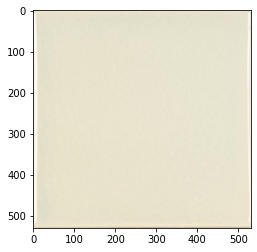

In [ ]:
new_test = []
test_img = cv2.imread("/content/10.jpg",cv2.IMREAD_UNCHANGED)
test_img = cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB)
resized_image = cv2.resize(test_img, (128, 128)) 
new_test.append(np.asarray( resized_image, dtype="uint8" ))
plt.imshow(test_img)

In [ ]:
x_test = np.asarray(new_test)
x_test = np.asarray(x_test.astype('float32') / 255.)
intermediate_output = intermediate_layer_model(x_test)
test_x = intermediate_output.numpy()
E_test_flatten = test_x.reshape((-1, np.prod(( 8,8,16))))

In [ ]:
_,indeces = knn.kneighbors(E_test_flatten)

In [ ]:
indeces,_

(array([[1002, 1023, 1165, 1020,  316, 1015,  525,  679,  826,   14]]),
 array([[0.0002681 , 0.00028288, 0.0003041 , 0.00032395, 0.00032818,
         0.00032914, 0.00033653, 0.00034308, 0.00035703, 0.00036323]],
       dtype=float32))

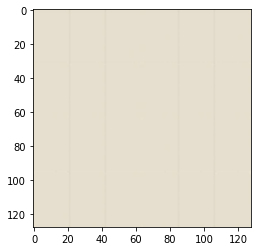

In [ ]:
plt.imshow(new_train[1165])